**Add Your Drive to the Folder**

In [ ]:
# Optional
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports & Configurations

**Importing the Libraries**

In [1]:
# Deafault Imports
import os
import logging
import warnings as wr
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as tfk
from keras import layers as tfkl
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Our Imports

**Configurations**

In [2]:
# Random Configuration - All
RND = False
if not RND:
  SEED = 76998669
  os.environ['PYTHONHASHSEED'] = str(SEED)
  tf.compat.v1.set_random_seed(SEED)
  tf.random.set_seed(SEED)
  np.random.seed(SEED)
  rnd.seed(SEED)

# OS Configuration
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

# Warning Congiguration
wr.simplefilter(action='ignore', category=FutureWarning)
wr.simplefilter(action='ignore', category=Warning)

# TensorFlow Configuration
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Local Functions

In [3]:
# Plotting Functions

def plot_losses(history, figsize, name_jpg):
  fig, axes = plt.subplots(2,1, figsize=figsize)

  axes[0].plot(history['loss'], label='Training Loss', alpha=.8)
  axes[0].plot(history['val_loss'], label='Validation Loss', alpha=.8)
  axes[0].set_title('Loss')
  axes[0].legend()
  axes[0].grid(alpha=.3)

  axes[1].plot(history['accuracy'], label='Training Accuracy', alpha=.8)
  axes[1].plot(history['val_accuracy'], label='Validation Accuracy', alpha=.8)
  axes[1].set_title('Accuracy')
  axes[1].legend()
  axes[1].grid(alpha=.3)

  plt.savefig(name_jpg)
  plt.show()

def plot_image(img, lbl):
  plt.figure(figsize=(10,10))
  plt.imshow(np.clip(img, 0, 1))
  plt.title(f'{lbl}')
  plt.show()
  print(img)

### Load and process the dataset

**Load the Dataset**

In [3]:
# Load the Dataset Files from Giovanni's Server
!wget https://storage.googleapis.com/storage.barbiero.dev/public_data_no_meme.npz

# !wget https://apps.barbiero.dev/static/public_data.npz
# !wget https://apps.barbiero.dev/static/public_data_clean.npz
# !wget https://storage.googleapis.com/storage.barbiero.dev/public_data_rot_flip.npz

--2023-11-06 09:40:49--  https://apps.barbiero.dev/static/public_data_clean.npz
Resolving apps.barbiero.dev (apps.barbiero.dev)... 104.21.8.111, 172.67.157.85, 2606:4700:3036::6815:86f, ...
Connecting to apps.barbiero.dev (apps.barbiero.dev)|104.21.8.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 536546306 (512M) [application/octet-stream]
Saving to: ‘public_data_clean.npz’

public_data_clean.n 100%[===================>] 511.69M  15.3MB/s    in 36s     

2023-11-06 09:41:25 (14.2 MB/s) - ‘public_data_clean.npz’ saved [536546306/536546306]



**Store the Data**

In [7]:
# Initializate
dataset = np.load('./res/dataset/public_data_clean.npz', allow_pickle=True)
dataset_rf = np.load('./res/dataset/public_data_rot_flip.npz', allow_pickle=True)

# Split into Images and Labels + Normalize the Image Data Set
KEYS = list(dataset.keys())
KEYS_RF = list(dataset_rf.keys())
IMG = np.array(dataset[KEYS[0]])/255
IMG_RF = np.array(dataset_rf[KEYS_RF[0]])/255
LBL = np.array(dataset[KEYS[1]])
LBL_RF = np.array(dataset_rf[KEYS_RF[1]])
print('Images: ', len(IMG))
print('Labels: ', len(LBL))

LBL = list(map(lambda x: 0 if x == "healthy" else 1, LBL))
LBL = tf.keras.utils.to_categorical(LBL)                                          # Enable for MultiClass Problem

LBL_RF = list(map(lambda x: 0 if x == "healthy" else 1, LBL_RF))
LBL_RF = tf.keras.utils.to_categorical(LBL_RF)                                          # Enable for MultiClass Problem

# Split the Data Set into Training XT YT, Validation XV YV, Test XTE YTE
Xtrv, XTE, Ytrv, YTE, Itrv, _ = train_test_split(IMG, LBL, np.arange(len(IMG)), test_size=500, random_state=SEED, stratify=np.argmax(LBL, axis=1))
XT, XV, YT, YV, IT, _ = train_test_split(Xtrv, Ytrv, Itrv, test_size=500, random_state=SEED, stratify=np.argmax(Ytrv, axis=1))


Images:  4850
Labels:  4850


In [8]:
print(len(IT))
for i, val in enumerate(IT):
  print(i, val)
  for j in range(7):
    XT = np.append(XT, [IMG_RF[i*7+j]], axis=0)
    YT = np.append(YT, [LBL_RF[i*7+j]], axis=0)

print('Training Set Shape: ', XT.shape, YT.shape)
print('Validation Set Shape: ', XV.shape, YV.shape)
print('Test Set Shape: ', XTE.shape, YTE.shape)
print()

# Get the Shape of IN OUT
input_shape = XT.shape[1:]
output_shape = YT.shape[1]                                                        # Enable for MultiClass Problem

print(f'Input shape of the Network: {input_shape}')
print(f'Output shape of the Network: {output_shape}')
print()

3850
0 3902
1 4389
2 1461
3 114
4 1165
5 1623
6 4036
7 1929
8 4339
9 4204
10 1683
11 2478
12 3374
13 1349
14 1066
15 1090
16 4671
17 817
18 4338
19 286
20 965
21 2429
22 158
23 736
24 3782
25 2246
26 2882
27 2541
28 173
29 2445
30 4641
31 2992
32 644
33 3376
34 4433
35 322
36 1507
37 61
38 3965
39 3515
40 1667
41 4788
42 4648
43 4205
44 2134
45 911
46 1630
47 2372
48 2067
49 1279
50 3094
51 1173
52 4572
53 3736
54 2782
55 4427
56 977
57 576
58 3527
59 4068
60 968
61 1649
62 2
63 4593
64 1087
65 666
66 2514
67 2388
68 1576
69 1770
70 946
71 1774
72 4562
73 43
74 1249
75 1347
76 3700
77 2168
78 407
79 2274
80 21
81 2037
82 696
83 1730
84 2001
85 45
86 4090
87 639
88 4462
89 3416
90 3489
91 2712
92 1871
93 836
94 2220
95 2442
96 348
97 4798
98 4825
99 4461
100 1490
101 3656
102 1742
103 1059
104 771
105 1333
106 1982
107 3985
108 450
109 2941
110 774
111 3993
112 3178
113 2628
114 3183
115 1338
116 3143
117 4668
118 1519
119 4412
120 3175
121 2904
122 2551
123 3803
124 2483
125 4441
126 3

KeyboardInterrupt: 

### Training

In [ ]:
# Model Function
def apple_elixir_model(input_shape, output_shape, seed=SEED):

  tf.random.set_seed(seed)

  # Build the neural network layer by layer
  input_layer = tfkl.Input(shape=input_shape, name='Input')

  x = tfkl.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',name='conv00')(input_layer)
  x = tfkl.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',name='conv01')(x)
  x = tfkl.MaxPooling2D(name='mp0')(x)

  x = tfkl.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',name='conv10')(x)
  x = tfkl.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',name='conv11')(x)
  x = tfkl.MaxPooling2D(name='mp1')(x)

  x = tfkl.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',name='conv20')(x)
  x = tfkl.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',name='conv21')(x)
  x = tfkl.MaxPooling2D(name='mp2')(x)

  # x = tfkl.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',name='conv30')(x)
  # x = tfkl.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',name='conv31')(x)
  # x = tfkl.GlobalAveragePooling2D(name='gap')(x)

  x = tfkl.Flatten()(x)
  x = tfkl.Dense(units = 30, activation='relu')(x)
  x = tfkl.Dense(units = 20, activation='relu')(x)
  x = tfkl.Dense(units = 10, activation='relu')(x)
  x = tfkl.Dense(units = 30, activation='relu')(x)

  output_layer = tfkl.Dense(units=output_shape ,activation='softmax', name='Output')(x)

  model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Convnet')
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(weight_decay=5e-4), metrics=['accuracy'])

  return model

**SetUp and Train**

In [ ]:
BTC = 64
EPO = 500
NAME_PLOT = "test_push"
NAME_MODEL = "model_push"
CALLBACKS = [
    tfk.callbacks.EarlyStopping(
      monitor='val_accuracy',
      mode='max',
      patience=20,
      restore_best_weights=True
    ),
    tfk.callbacks.ReduceLROnPlateau(
      monitor="val_accuracy",
      factor=0.1,
      patience=20,
      min_lr=1e-5,
      mode='max'
    )
]

Model: "Convnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv00 (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 conv01 (Conv2D)             (None, 96, 96, 32)        9248      
                                                                 
 mp0 (MaxPooling2D)          (None, 48, 48, 32)        0         
                                                                 
 conv10 (Conv2D)             (None, 48, 48, 64)        18496     
                                                                 
 conv11 (Conv2D)             (None, 48, 48, 64)        36928     
                                                                 
 mp1 (MaxPooling2D)          (None, 24, 24, 64)        0   

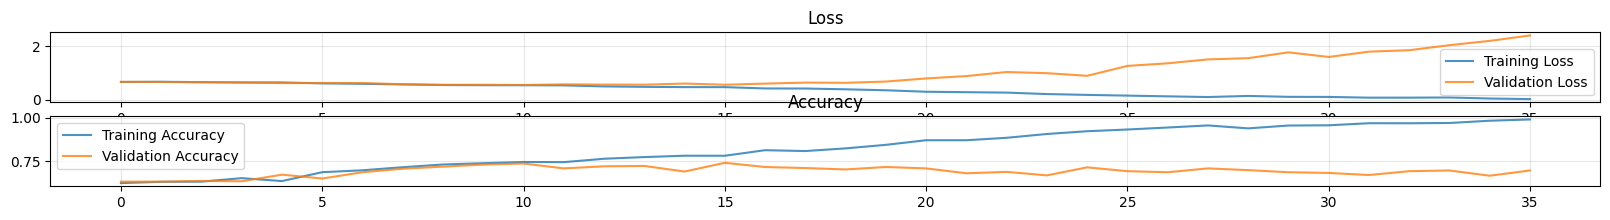

In [ ]:
model = apple_elixir_model(input_shape=input_shape, output_shape=output_shape)
model.summary()

history = model.fit(
  x = XT,                                                                         # We need to apply the preprocessing thought for the MobileNetV2 network
  y = YT,
  batch_size = BTC,
  epochs = EPO,
  validation_data = (XV, YV),                                               # We need to apply the preprocessing thought for the MobileNetV2 network
  callbacks = CALLBACKS
).history

plot_losses(history=history, figsize=(20,2), name_jpg=NAME_PLOT)
model.save(NAME_MODEL)
del model

In [ ]:
!zip -r model.zip {NAME_MODEL} {NAME_PLOT}.png

  adding: model_push/ (stored 0%)
  adding: model_push/assets/ (stored 0%)
  adding: model_push/keras_metadata.pb (deflated 93%)
  adding: model_push/fingerprint.pb (stored 0%)
  adding: model_push/saved_model.pb (deflated 89%)
  adding: model_push/variables/ (stored 0%)
  adding: model_push/variables/variables.data-00000-of-00001 (deflated 22%)
  adding: model_push/variables/variables.index (deflated 68%)
  adding: test_push.png (deflated 8%)


### Evaluate the Model

In [ ]:
# Evaluate a Different Model From the one Just Trained
NAME_MODEL = ""

**Load the Model**

In [ ]:
model = tfk.models.load_model(NAME_MODEL)
model.summary()
print()

Model: "Convnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv00 (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 conv01 (Conv2D)             (None, 96, 96, 32)        9248      
                                                                 
 mp0 (MaxPooling2D)          (None, 48, 48, 32)        0         
                                                                 
 conv10 (Conv2D)             (None, 48, 48, 64)        18496     
                                                                 
 conv11 (Conv2D)             (None, 48, 48, 64)        36928     
                                                                 
 mp1 (MaxPooling2D)          (None, 24, 24, 64)        0   

**Evaluate**

In [ ]:
# Training Comparison
train_predictions = model.predict(XT, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)
train_gt = np.argmax(YT, axis=-1)
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy Score over the Train Set: {round(train_accuracy, 4)}')
print()

# Validation Comparison
val_predictions = model.predict(XV, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)
val_gt = np.argmax(YV, axis=-1)
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy Score over the Validation Set: {round(val_accuracy, 4)}')
print()

# Test
test_predictions = model.predict(XT, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)
test_gt = np.argmax(YT, axis=-1)
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy Score over the Test Set: {round(test_accuracy, 4)}')
print()

Accuracy Score over the Train Set: 0.813

Accuracy Score over the Validation Set: 0.74

Accuracy Score over the Test Set: 0.813



### Extra